In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv
import os

In [3]:
%matplotlib inline

In [4]:
log_dicts = sorted(glob.glob('POV_RD*/'), key= lambda x:int(x.split('_')[-1].split('/')[0]))

In [9]:
tip = {}
bs_lr = {32:[0.0001], 64:[0.0005]}
bs_ng = {32:[4], 64:[4]}

i = 0
toto = []
toto2 = []
toto3 = []
for prob in ['pow']:
    for bs in [32, 64]:
        for lr in bs_lr[bs]:
            for dire in ["False"]:
                for ng in bs_ng[bs]:
                    for ws in [-1, 5]:
                        for rd_t in range(4):
                            tip[i] = (bs,ws,rd_t)
                            toto.append((bs,ws))
                            toto2.append((bs,rd_t))
                            toto3.append((ws, rd_t))
                            i+=1
toto = list(set(toto))
toto2 = list(set(toto2))
toto3 = list(set(toto3))


In [11]:
len(toto), len(toto2), len(toto3)

(4, 8, 8)

In [5]:
def parse_config(log_di, my_keys):
    config = open(log_di+'log.txt').read().split('\n')
    dat_conf = {}
    for ll in config:
        if 'Resume' in ll:
            break
        if ll.split(':')[0] in my_keys:
            dat_conf[ll.split(':')[0]] = ll.split(':')[1]
    return dat_conf

In [6]:
def read_to_dict(file_name):
    res_dict = {}
    keym = {}
    with open(file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                for j, rr in enumerate(row):
                    res_dict[rr] = []
                    keym[j] = rr
            else:
                for j, rr in enumerate(row):
                    res_dict[keym[j]].append(float(rr))
    return res_dict

In [7]:
train_res_dict = {}
val_res_dict = {}
test_res_dict = {}
in_test_res_dict = {}

for logd in log_dicts:
    keym = {}
    print(logd)
    train_res_dict[logd] = read_to_dict('{}train_algo.csv'.format(logd))
    val_res_dict[logd] = read_to_dict('{}val_eval.csv'.format(logd))
    test_res_dict[logd] = read_to_dict('{}test_eval.csv'.format(logd))
    in_test_res_dict[logd] = read_to_dict('{}id_test_eval.csv'.format(logd))

POV_RD_0/
POV_RD_1/
POV_RD_2/
POV_RD_3/
POV_RD_4/
POV_RD_5/
POV_RD_6/
POV_RD_7/
POV_RD_8/
POV_RD_9/
POV_RD_10/
POV_RD_11/
POV_RD_12/
POV_RD_13/
POV_RD_14/
POV_RD_15/


In [8]:
test_res_dict[logd].keys()

dict_keys(['epoch', 'mse_avg', 'mse_urban:0', 'count_urban:0', 'mse_urban:1', 'count_urban:1', 'mse_wg', 'r_all', 'r_urban:0', 'r_urban:1', 'r_wg'])

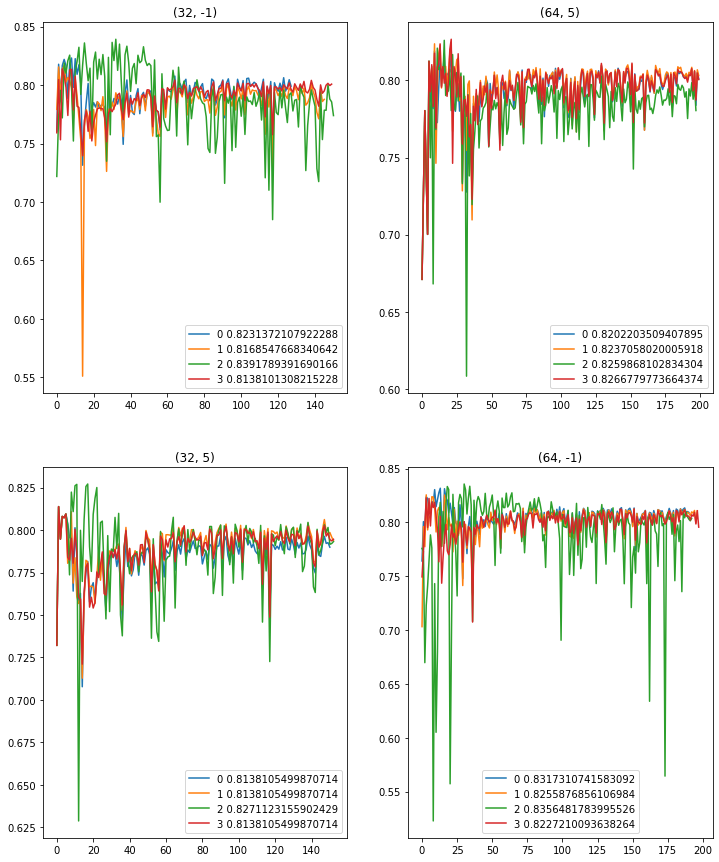

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12,15))
for i,logd in enumerate(test_res_dict):
    ti = toto.index((tip[i][0], tip[i][1]))
    loc1 = ti%2
    loc2 = int((ti - loc1)/2)
    newl = "{} {}".format(tip[i][2], np.max(test_res_dict[logd]['r_all']))
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], np.array(test_res_dict[logd]['r_all']), label=newl)
    axs[loc1,loc2].set_title("{}".format((tip[i][0], tip[i][1])))
    axs[loc1,loc2].legend()

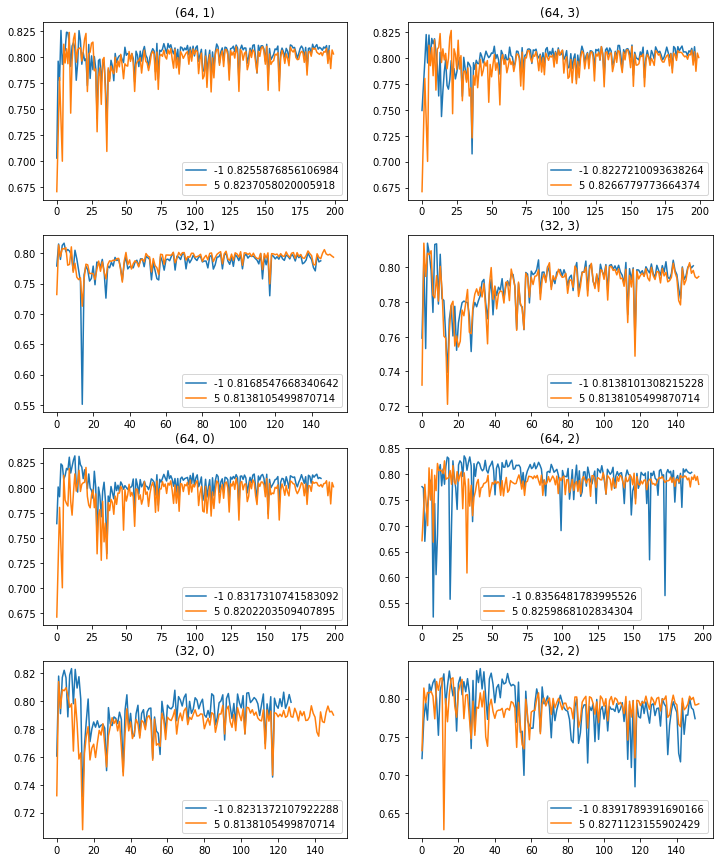

In [15]:
fig, axs = plt.subplots(4, 2, figsize=(12,15))
for i,logd in enumerate(test_res_dict):
    ti = toto2.index((tip[i][0], tip[i][2]))
    loc1 = ti%4
    loc2 = int((ti - loc1)/4)
    newl = "{} {}".format(tip[i][1],np.max(test_res_dict[logd]['r_all']))
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], np.array(test_res_dict[logd]['r_all']),label=newl)
    axs[loc1,loc2].legend()
    axs[loc1,loc2].set_title("{}".format((tip[i][0], tip[i][2])))

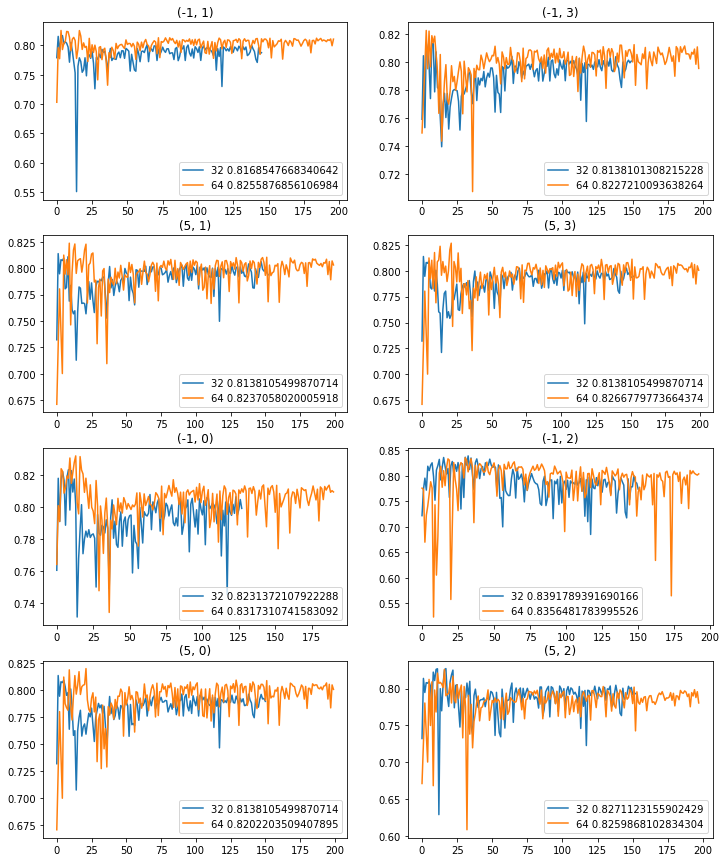

In [17]:
fig, axs = plt.subplots(4, 2, figsize=(12,15))
for i,logd in enumerate(test_res_dict):
    ti = toto3.index((tip[i][1], tip[i][2]))
    loc1 = ti%4
    loc2 = int((ti - loc1)/4)
    newl = "{} {}".format(tip[i][0],np.max(test_res_dict[logd]['r_all']))
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], np.array(test_res_dict[logd]['r_all']),label=newl)
    axs[loc1,loc2].legend()
    axs[loc1,loc2].set_title("{}".format((tip[i][1], tip[i][2])))

In [ ]:
bs_lr = {32:[0.0001], 64:[0.0005]}
bs_ng = {32:[4], 64:[4]}

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12,15))
for i,logd in enumerate(test_res_dict):
    ti = toto3.index((tip[i][0], tip[i][2], tip[i][3]))
    loc1 = ti%3
    loc2 = int((ti - loc1)/3)
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], np.array(test_res_dict[logd]['r_all']),label=tip[i][1])
    axs[loc1,loc2].legend()
    axs[loc1,loc2].set_title("{}".format((tip[i][0], tip[i][2], tip[i][3])))

In [62]:
 tip

{0: (32, 5e-05, 'False', 4),
 1: (32, 5e-05, 'True', 4),
 2: (32, 0.0001, 'False', 4),
 3: (32, 0.0001, 'True', 4),
 4: (64, 0.0001, 'False', 4),
 5: (64, 0.0001, 'False', 8),
 6: (64, 0.0001, 'True', 4),
 7: (64, 0.0001, 'True', 8),
 8: (64, 5e-05, 'False', 4),
 9: (64, 5e-05, 'False', 8),
 10: (64, 5e-05, 'True', 4),
 11: (64, 5e-05, 'True', 8),
 12: (64, 0.0005, 'False', 4),
 13: (64, 0.0005, 'False', 8),
 14: (64, 0.0005, 'True', 4),
 15: (64, 0.0005, 'True', 8),
 16: (64, 0.001, 'False', 4),
 17: (64, 0.001, 'False', 8),
 18: (64, 0.001, 'True', 4),
 19: (64, 0.001, 'True', 8)}